# Default Credit Classifier

Please read ReadMe.md file to learn more about the pre-requisites to run this Jupyter Notebook file.

## Importing packages

In [14]:
import pandas
import matplotlib.pyplot as plt;
import numpy as np;
from sklearn.model_selection import train_test_split;
from sklearn.metrics import accuracy_score, log_loss;
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.tree import export_graphviz
from IPython.display import Image
from subprocess import call
from graphviz import Digraph
from sklearn import metrics
import graphviz

## Data Pre-Processing

To coup up, data pre-processing had steps below:

1. Taking pre-cleaned csv file
The pre-cleaned csv here, means that the header that contains X1 to Y row is cleaned. And change the label column header as "LABEL"

2. Data cleaning
Some exist data is stored and not having value of the one that documented. To prevent any classification errors, we removing it.

3. Perform One-Hot Encoding for the ordinal values

In [15]:
# Loading data from pre-cleaned csv file
dataframe = pandas.read_csv("credit_card_clients.csv");

# Some education data contains 0, 5, and 6. I eliminating 'em.

invalid_education_data = [];
for idx, e in enumerate(dataframe['EDUCATION']):
    if(e > 4 or e < 1):
        invalid_education_data.append(idx);

# Some marriage data contains 0. I eliminating 'em.

invalid_marriage_data = [];
for idx, e in enumerate(dataframe['MARRIAGE']):
    if(e == 0):
        invalid_marriage_data.append(idx);

final_invalid_data_index = [];
for e in [invalid_marriage_data, invalid_education_data]:
    for f in e:
        
        # Check the index. If it throw exception, append the number. 
        try:
            final_invalid_data_index.index(f);
            continue;
        except:
            final_invalid_data_index.append(f);

dataframe = dataframe.drop(final_invalid_data_index);

# Make one hot encoding for Sex, Educuation, and Marriage since the data is an ordinal data
hot_encoded_sex = pandas.get_dummies(dataframe['SEX'], prefix = "sex");
hot_encoded_education = pandas.get_dummies(dataframe['EDUCATION'], prefix = "education");
hot_encoded_marital_status = pandas.get_dummies(dataframe['MARRIAGE'], prefix = "marital_status");

# Merge the hot_encoded with the main dataframe
for i in [hot_encoded_sex, hot_encoded_education,hot_encoded_marital_status]:
    dataframe = pandas.concat([dataframe, i], axis = 1);



print("Data after cleaning: ", dataframe.shape);
print(dataframe.columns.tolist());

Data after cleaning:  (29601, 34)
['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'LABEL', 'sex_1', 'sex_2', 'education_1', 'education_2', 'education_3', 'education_4', 'marital_status_1', 'marital_status_2', 'marital_status_3']


## Split train-test data
In this part, we split the data by 9:1 percentile. Also defining which one is label and features.

In [16]:
# Define label data
label = dataframe['LABEL'];

# Drop ID, SEX, EDUCATION, MARRIAGE, and LABEL from dataframe for features
features = dataframe.drop(columns=["ID", "SEX", "EDUCATION", "MARRIAGE", "LABEL"]);
features.columns= features.columns.astype(str) 

print(features.columns);


# Split the data into training and testing sets
feature_train, feature_test, label_train, label_test = train_test_split(features, label, test_size = 0.1,random_state = 0)


Index(['LIMIT_BAL', 'AGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5',
       'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4',
       'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3',
       'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'sex_1', 'sex_2', 'education_1',
       'education_2', 'education_3', 'education_4', 'marital_status_1',
       'marital_status_2', 'marital_status_3'],
      dtype='object')


# Loading Decision Tree Classifier

In [17]:
decision_tree_classifier = DecisionTreeClassifier(criterion = 'entropy', random_state=0, max_depth=10)
print(label_test)

27880    0
10152    0
9016     0
942      0
22745    0
        ..
7695     0
2100     0
22167    0
5619     0
3181     0
Name: LABEL, Length: 2961, dtype: int64


# Showing Parameters the Tree Classifier

In [18]:
decision_tree_classifier

DecisionTreeClassifier(criterion='entropy', max_depth=10, random_state=0)

# Training the Decision Tree Classifier

In [19]:
decision_tree_classifier.fit(feature_train, label_train)
label_predict = decision_tree_classifier.predict(feature_test)

# Show the Accuracy of the Decision Tree

In [20]:
score = decision_tree_classifier.score(feature_test, label_test)
print('Accuracy of Decision Tree: ', score)

Accuracy of Decision Tree:  0.828774062816616


# Showing Prediction Labels

In [21]:
label_predict

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

# Showing Tests' Label

In [22]:
label_test

27880    0
10152    0
9016     0
942      0
22745    0
        ..
7695     0
2100     0
22167    0
5619     0
3181     0
Name: LABEL, Length: 2961, dtype: int64

# Create and Display the Accuracy of Confusion Matrix

In [23]:
confusion_matrix = metrics.confusion_matrix(label_test, label_predict)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['True', 'False'])

print('Confusion Matrix Accuracy: ', metrics.accuracy_score(label_test, label_predict))

Confusion Matrix Accuracy:  0.828774062816616


# Display Heat Map of Confusion Matrix

<function matplotlib.pyplot.show(close=None, block=None)>

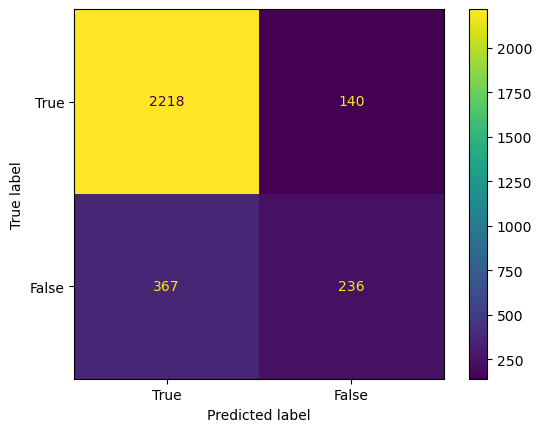

In [24]:
cm_display.plot()
plt.show

# Visualize Decision Tree by Exporting to Image

['LIMIT_BAL', 'AGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'sex_1', 'sex_2', 'education_1', 'education_2', 'education_3', 'education_4', 'marital_status_1', 'marital_status_2', 'marital_status_3']


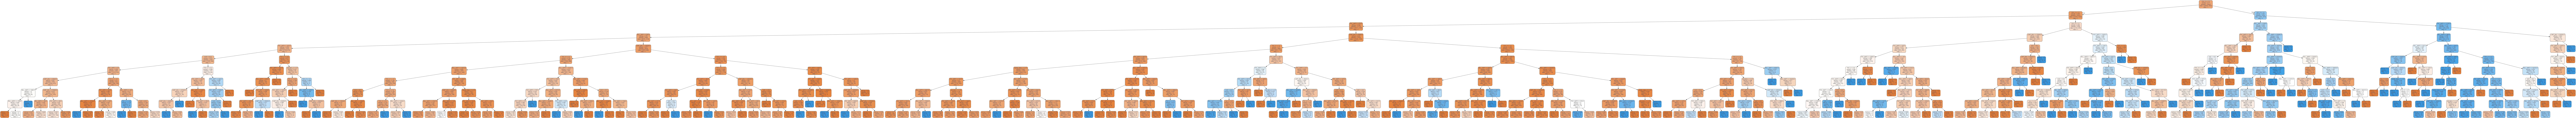

In [25]:
print(features.columns.tolist())

class_name = np.array(label.unique()).astype('str').tolist()

tree = export_graphviz(decision_tree_classifier, out_file='tree_decision.dot', feature_names = features.columns, class_names = class_name, rounded=True, filled=True)

call(['dot', '-Tpng', 'tree_decision.dot', '-o', 'tree.png', '-Gdpi=800'])
Image(filename = 'tree.png')
